# Develop summary fig
The purpose of this notebook is to develop a summary figure to showcase the learned dynamical solutions.

# Imports

In [1]:
import jax
import jax.numpy as jnp
from jax import random
from flax import linen as nn
from src.task import SETDataset
from src.model import EulerCTRNNCell
from src.training import create_train_state, MetricsHistory, ModelParameters
from src.analysis import generate_dynamics_plot

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

key = random.PRNGKey(0)

2024-01-15 23:46:54.305726: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-01-15 23:46:57.768487: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2024-01-15 23:46:57.768633: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2024-01-15 23:46:57.768650: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed proper

## Load metrics model

In [2]:
features = 100
alpha = jnp.float32(1.0)
noise = jnp.float32(0.0)
ctrnn = nn.RNN(EulerCTRNNCell(features=features, alpha=alpha, noise=noise,))

key, subkey = random.split(key)
state = create_train_state(ctrnn, subkey, 0.001, 1.0)

In [3]:
save_loc = '../results/script_examples/params.bin'
model_params = ModelParameters(state)
model_params.deserialize(save_loc,)

In [4]:
metrics_history = MetricsHistory([
    'train_loss', 'train_accuracy',
    'test_loss', 'test_accuracy',
    'grok_loss', 'grok_accuracy',
    'corrupt_loss', 'corrupt_accuracy',
])

save_loc = '../results/script_examples/metrics_history.csv'
metrics_history.load_from_csv(save_loc)

## Recreate SET dataset

In [5]:
key = random.PRNGKey(0)
key, subkey = random.split(key)
set_dataset = SETDataset(subkey, 30, 1, 128)
set_dataset.print_training_testing()
training_tf_dataset, testing_tf_dataset, grok_tf_dataset, corrupt_tf_dataset = set_dataset.tf_datasets()


TRAINING DATA

Accepting Grid:
SET_combinations | Number of Trials | Status
GGG | 60 | 
GPR | 60 | 
GRP | 60 | 
PGR | 60 | 
PPP | 60 | 
PRG | 60 | 
RGP | 60 | 
RPG | 60 | 
RRR | 60 | 

Rejecting Grid:
SET_combinations | Number of Trials | Status
GGP | 30 | 
GGR | 30 | 
GPG | 30 | 
GPP | 30 | 
GRG | 30 | 
GRR | 30 | 
PGG | 30 | 
PGP | 30 | 
PPG | 30 | 
PPR | 30 | 
PRP | 30 | 
PRR | 30 | 
RGG | 30 | 
RGR | 30 | 
RPP | 30 | 
RPR | 30 | 
RRG | 30 | 
RRP | 30 | 

----------

TESTING DATA

Accepting Grid:
SET_combinations | Number of Trials | Status
GGG | 1 | 
GPR | 1 | 
GRP | 1 | 
PGR | 1 | 
PPP | 1 | 
PRG | 1 | 
RGP | 1 | 
RPG | 1 | 
RRR | 1 | 

Rejecting Grid:
SET_combinations | Number of Trials | Status
GGP | 1 | 
GGR | 1 | 
GPG | 1 | 
GPP | 1 | 
GRG | 1 | 
GRR | 1 | 
PGG | 1 | 
PGP | 1 | 
PPG | 1 | 
PPR | 1 | 
PRP | 1 | 
PRR | 1 | 
RGG | 1 | 
RGR | 1 | 
RPP | 1 | 
RPR | 1 | 
RRG | 1 | 
RRP | 1 | 

----------

GROK DATA

Accepting Grid:
SET_combinations | Number of Trials | Status

Reje

2024-01-15 23:47:38.467805: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2024-01-15 23:47:38.474168: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)


## Prototype graph

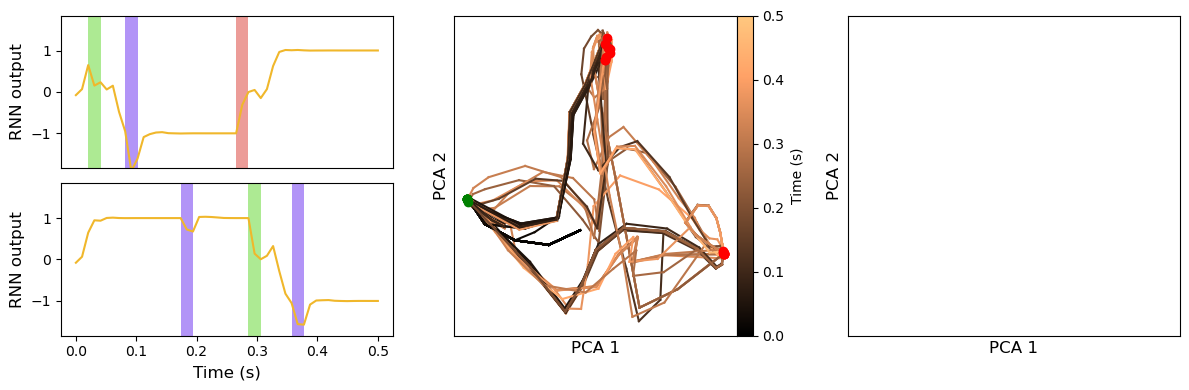

In [6]:
save_loc = '../results/script_examples/attractive_plot.jpg'

key, subkey = random.split(key)
generate_dynamics_plot(
    subkey, 
    ctrnn, 
    model_params.params, 
    training_tf_dataset, 
    testing_tf_dataset, 
    set_dataset, 
    "attractive", 
    save_loc
)

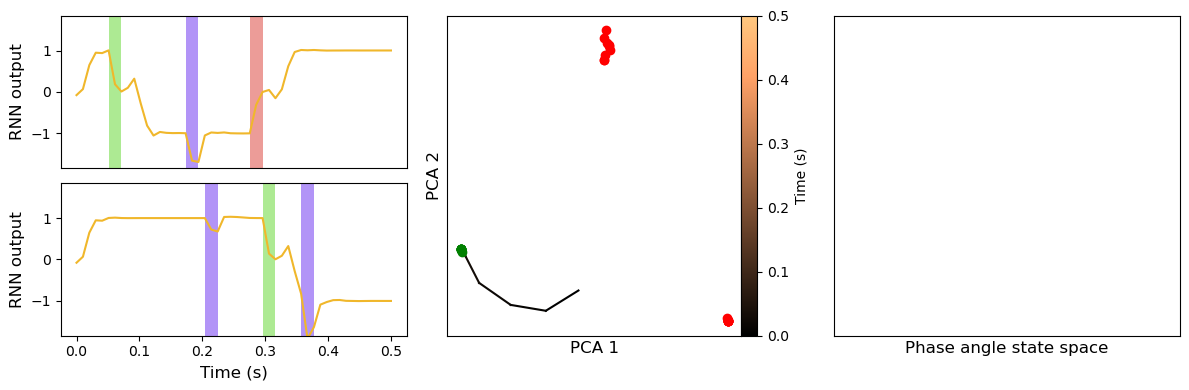

In [7]:
save_loc = '../results/script_examples/oscillatory_plot.jpg'

key, subkey = random.split(key)
generate_dynamics_plot(
    subkey, 
    ctrnn, 
    model_params.params, 
    training_tf_dataset, 
    testing_tf_dataset, 
    set_dataset, 
    "oscillatory", 
    save_loc
)